# Table of Contents
* [CK12 flexbook pdf extraction](#CK12-flexbook-pdf-extraction)
	* [Experiment](#Experiment)


In [1]:
%%capture
import numpy as np
import pandas as pd
import scipy.stats as st
import itertools
import math
from collections import Counter, defaultdict, OrderedDict
%load_ext autoreload
%autoreload 2

import cv2
import pprint
import pickle
import json
import requests
import io
import base64
from wand.image import Image as WImage
from IPython.display import display
import PIL.Image as Image

from copy import deepcopy
import pdfextraction.pdf_processing as pdf_processing

# CK12 flexbook pdf extraction

This notebook compares the OCR results embedded in the textbook scans to those of eric's api, and MS oxford alone

In [2]:
text_path = './ck12_pdfs/text/'
life_sci_text = 'CK-12-Life-Science-For-Middle-School_b_v77_dzc_s1.pdf'
earth_sci_text ='CK-12-Earth-Science-For-Middle-School_b_v39_yq9_s1.pdf'
phys_sci_text ='CK-12-Physical-Science-For-Middle-School_b_v45_cmw_s1.pdf'
# test_file = text_path + earth_sci_text
# test_file = text_path + life_sci_text
test_file = './ck12_pdfs/text/test_page.pdf'

In [3]:
test_file

'./ck12_pdfs/text/test_page.pdf'

## pdfminer

In [4]:
test_page_layout = pdf_processing.make_page_layouts(test_file, [0,43], word_margin=0.1, line_overlap=0.5, char_margin=2.0, line_margin=0.5, boxes_flow=0.5)

In [5]:
test_page_layout[0]._objs

[<LTTextBoxHorizontal(0) 54.000,761.451,117.927,775.272 u'www.ck12.org\n'>,
 <LTTextBoxHorizontal(1) 436.386,761.451,555.273,775.272 u'Chapter 4. Cell Functions\n'>,
 <LTTextBoxHorizontal(2) 98.382,694.737,236.200,725.331 u'4.1 Transport\n'>,
 <LTTextBoxHorizontal(3) 54.000,610.841,168.099,627.859 u'Lesson Objectives\n'>,
 <LTTextBoxHorizontal(4) 72.000,557.794,278.073,598.714 u'\u2022 Describe the structure of the cell membrane.\n\u2022 Identify ways that passive transport occurs.\n\u2022 De\ufb01ne and give examples of active transport.\n'>,
 <LTTextBoxHorizontal(5) 54.000,496.318,171.107,513.336 u'Lesson Vocabulary\n'>,
 <LTTextBoxHorizontal(6) 72.000,348.427,166.636,484.191 u'\u2022 active transport\n\u2022 concentration\n\u2022 diffusion\n\u2022 facilitated diffusion\n\u2022 osmosis\n\u2022 passive transport\n\u2022 simple diffusion\n\u2022 transport\n\u2022 transport protein\n\u2022 vesicle transport\n'>,
 <LTTextBoxHorizontal(7) 54.000,286.951,129.055,303.969 u'Introduction\n'>,

In [13]:
test_page_layout[0]._objs[-4]

{'bbox': (54.0, 723.20454, 558.0065, 723.20454),
 'height': 0.0,
 'linewidth': 1.99255,
 'pts': [(54.0, 723.20454), (558.0065, 723.20454)],
 'width': 504.00649999999996,
 'x0': 54.0,
 'x1': 558.0065,
 'y0': 723.20454,
 'y1': 723.20454}

In [7]:
test_char_ext = test_page_layout[0]._objs[0]._objs[0]._objs[0]

In [17]:
test_char_ext.fontsize.__dict__

{'ascent': 924,
 'basefont': 'XCRUNF+NimbusRomNo9L-Regu',
 'bbox': [-199, -312, 1031, 955],
 'cid2unicode': {32: u' ',
  33: u'!',
  34: u'"',
  35: u'#',
  36: u'$',
  37: u'%',
  38: u'&',
  39: u"'",
  40: u'(',
  41: u')',
  42: u'*',
  43: u'+',
  44: u',',
  45: u'-',
  46: u'.',
  47: u'/',
  48: u'0',
  49: u'1',
  50: u'2',
  51: u'3',
  52: u'4',
  53: u'5',
  54: u'6',
  55: u'7',
  56: u'8',
  57: u'9',
  58: u':',
  59: u';',
  60: u'<',
  61: u'=',
  62: u'>',
  63: u'?',
  64: u'@',
  65: u'A',
  66: u'B',
  67: u'C',
  68: u'D',
  69: u'E',
  70: u'F',
  71: u'G',
  72: u'H',
  73: u'I',
  74: u'J',
  75: u'K',
  76: u'L',
  77: u'M',
  78: u'N',
  79: u'O',
  80: u'P',
  81: u'Q',
  82: u'R',
  83: u'S',
  84: u'T',
  85: u'U',
  86: u'V',
  87: u'W',
  88: u'X',
  89: u'Y',
  90: u'Z',
  91: u'[',
  92: u'\\',
  93: u']',
  94: u'^',
  95: u'_',
  96: u'`',
  97: u'a',
  98: u'b',
  99: u'c',
  100: u'd',
  101: u'e',
  102: u'f',
  103: u'g',
  104: u'h',
  105: u'i'

In [12]:
dir(test_char_ext.fontsize)

['__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'ascent',
 'basefont',
 'bbox',
 'char_disp',
 'char_width',
 'cid2unicode',
 'decode',
 'default_width',
 'descent',
 'descriptor',
 'flags',
 'fontname',
 'get_ascent',
 'get_descent',
 'get_height',
 'get_width',
 'hscale',
 'is_multibyte',
 'is_vertical',
 'italic_angle',
 'leading',
 'string_width',
 'to_unichr',
 'unicode_map',
 'vscale',
 'widths']

## pdfminer drawing boxes

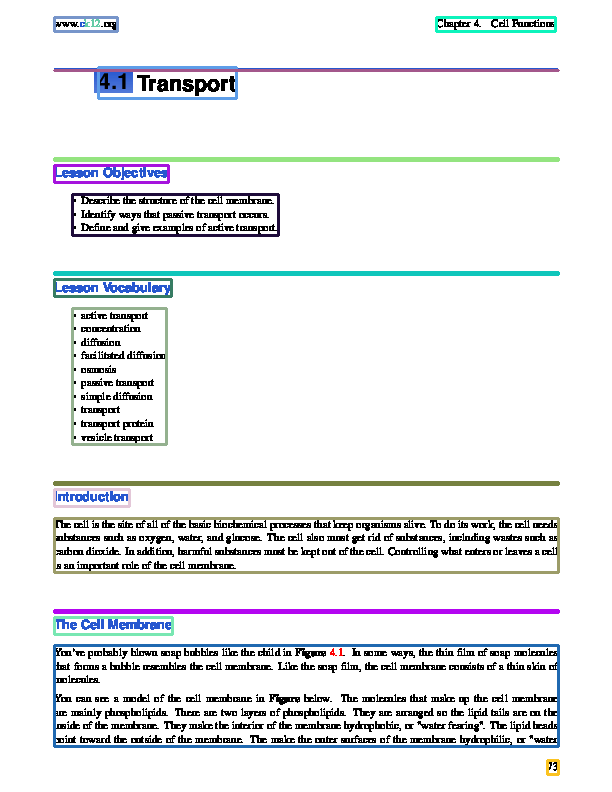

In [8]:
# pdf_processing.draw_pdf_with_boxes(test_file, [50,50])
pdf_processing.draw_pdf_with_boxes(test_file, [0,1])

In [277]:
def get_deepest_nested_component(layout_comp):
    if hasattr(layout_comp, '_objs'):
        return get_first_nested_component(layout_comp._objs[0])
    else:
        return layout_comp

def check_for_topic_header(text_box, header_font):
    first_char = get_deepest_nested_component(text_box)
    if hasattr(first_char, 'fontname'):
        box_font = first_char.fontname.split('_')[-1]
        print box_font
        return box_font == header_font
    else:
        return False

def process_line(text_box):
    return check_for_topic_header(text_box)

def process_page(page_layout, header_font = 'Bold'):
    for box in page_layout:
        print box
        header_found = check_for_topic_header(box, header_font)

In [7]:
test_page_layout[0]._objs

[<LTTextBoxHorizontal(0) 54.000,761.451,117.927,775.272 u'www.ck12.org\n'>,
 <LTTextBoxHorizontal(1) 436.386,761.451,555.273,775.272 u'Chapter 4. Cell Functions\n'>,
 <LTTextBoxHorizontal(2) 98.382,694.737,236.200,725.331 u'4.1 Transport\n'>,
 <LTTextBoxHorizontal(3) 54.000,610.841,168.099,627.859 u'Lesson Objectives\n'>,
 <LTTextBoxHorizontal(4) 72.000,557.794,278.073,598.714 u'\u2022 Describe the structure of the cell membrane.\n\u2022 Identify ways that passive transport occurs.\n\u2022 De\ufb01ne and give examples of active transport.\n'>,
 <LTTextBoxHorizontal(5) 54.000,496.318,171.107,513.336 u'Lesson Vocabulary\n'>,
 <LTTextBoxHorizontal(6) 72.000,348.427,166.636,484.191 u'\u2022 active transport\n\u2022 concentration\n\u2022 diffusion\n\u2022 facilitated diffusion\n\u2022 osmosis\n\u2022 passive transport\n\u2022 simple diffusion\n\u2022 transport\n\u2022 transport protein\n\u2022 vesicle transport\n'>,
 <LTTextBoxHorizontal(7) 54.000,286.951,129.055,303.969 u'Introduction\n'>,

In [ ]:
'KCJNMV+NimbusRomNo9L-Regu-Slant_167'

In [280]:
to1 = test_page_layout[0]._objs[2]._objs[0]._objs[0]

## Minecart + poppler direct

In [20]:
import minecart

In [28]:
ROW_BORDERS = (
    72 * 1,  # Bottom row starts 1 inch from the bottom of the page
    72 * 3,  # Second row starts 3 inches from the bottom of the page
    72 * 5,  # Third row starts 5 inches from the bottom of the page
    72 * 7,  # Third row ends 7 inches from the bottom of the page
)
COLUMN_BORDERS = (
    72 * 8,  # Third col ends 8 inches from the left of the page
    72 * 6,  # Third col starts 6 inches from the left of the page
    72 * 4,  # Second col starts 4 inches from the left of the page   
    72 * 2,  # First col starts 2 inches from the left of the page
)  # reversed so that BOXES is ordered properly
BOXES = [
    (left, bot, right, top)
    for top, bot in zip(ROW_BORDERS, ROW_BORDERS[1:])
    for left, right in zip(COLUMN_BORDERS, COLUMN_BORDERS[1:])
]

def extract_output(page):
    """
    Reads the text from page and splits it into the 9 cells.

    Returns a list with 9 entries: 

        [A, B, C, D, E, F, G, H, I]

    Each item in the tuple contains a string with all of the
    text found in the cell.

    """
    res = []
    for box in BOXES:
        strings = list(page.letterings.iter_in_bbox(box))
        # We sort from top-to-bottom and then from left-to-right, based
        # on the strings' top left corner
        strings.sort(key=lambda x: (-x.bbox[3], x.bbox[0]))
        res.append(" ".join(strings).replace(u"\xa0", " ").strip())
    return res

In [24]:
content = []
doc = minecart.Document(open(test_file, 'rb'))

In [9]:
# for page in doc.iter_pages():
#     content.append(extract_output(page))

In [37]:
import poppler

ImportError: No module named poppler

In [33]:
import ctypes
import sys
import os.path
import poppler_page
lib_poppler = ctypes.cdll.LoadLibrary("/usr/local/Cellar/poppler/0.37.0/lib/libpoppler-glib.8.dylib")
 
ctypes.pythonapi.PyCapsule_GetPointer.restype = ctypes.c_void_p
ctypes.pythonapi.PyCapsule_GetPointer.argtypes = [ctypes.py_object, ctypes.c_char_p]
PyCapsule_GetPointer = ctypes.pythonapi.PyCapsule_GetPointer
 
class Poppler_Rectangle(ctypes.Structure):
    _fields_ = [ ("x1", ctypes.c_double), ("y1", ctypes.c_double), ("x2", ctypes.c_double), ("y2", ctypes.c_double) ]
LP_Poppler_Rectangle = ctypes.POINTER(Poppler_Rectangle)
poppler_page_get_text_layout = ctypes.CFUNCTYPE(ctypes.c_int, 
                                                ctypes.c_void_p, 
                                                ctypes.POINTER(LP_Poppler_Rectangle), 
                                                ctypes.POINTER(ctypes.c_uint)
                                                )(lib_poppler.poppler_page_get_text_layout)
 
def get_page_layout(page):
    assert isinstance(page, Poppler.Page)
    capsule = page.__gpointer__
    page_addr = PyCapsule_GetPointer(capsule, None)
    rectangles = LP_Poppler_Rectangle()
    n_rectangles = ctypes.c_uint(0)
    has_text = poppler_page_get_text_layout(page_addr, ctypes.byref(rectangles), ctypes.byref(n_rectangles))
    try:
        result = []
        if has_text:
            assert n_rectangles.value > 0, "n_rectangles.value > 0: {}".format(n_rectangles.value)
            assert rectangles, "rectangles: {}".format(rectangles)
            for i in range(n_rectangles.value):
                r = rectangles[i]
                result.append((r.x1, r.y1, r.x2, r.y2))
        return result
    finally:
        if rectangles:
            GLib.free(ctypes.addressof(rectangles.contents))
 
def main():
    
    print 'Version:', Poppler.get_version()
    path= test_file
    if not os.path.isabs(path):
        path=os.path.join(os.getcwd(), path)
    d=Poppler.Document.new_from_file('file:'+path)
    n=d.get_n_pages()
    for pg_no in range(n):
        p=d.get_page(pg_no)
        print 'Page %d' % (pg_no+1), 'size ', p.get_size()
        text=p.get_text().decode('UTF-8')
        locs=get_page_layout(p)
        fonts=p.get_text_attributes()
        offset=0
        cfont=0
        for line in text.splitlines(True):
            print ' ', line.encode('UTF-8'),
            n=len(line)
            for i in range(n):
                if line[i]==u'\n':
                    continue
                font=fonts[cfont]
                while font.start_index > i+offset or font.end_index < i+offset:
                    cfont+=1
                    if cfont>= len(fonts):
                        font=None
                        break
                    font=fonts[cfont]
                
                bb=locs[offset+i]
                print line[i].encode('UTF-8'), '(%0.2f, %0.2f, %0.2f, %0.2f)' % bb,
                if font:
                    print font.font_name, font.font_size, 'r=%d g=%d, b=%d'%(font.color.red, font.color.green, font.color.blue),
            offset+=n
            print       
        print
        #p.free_text_attributes(fonts)

## pdfparser

In [18]:
import pdfparser.poppler as pdf
import sys
 
d=pdf.Document(test_file)
 
print 'No of pages', d.no_of_pages
for p in d:
#     print 'Page', p.page_no, 'size =', p.size
    for f in p:
#         print ' '*1,'Flow'
        for b in f:
#             print ' '*2,'Block', 'bbox=', b.bbox.as_tuple()
            for l in b:
#                 print ' '*3, l.text.encode('UTF-8'), '(%0.2f, %0.2f, %0.2f, %0.2f)'% l.bbox.as_tuple()
                #assert l.char_fonts.comp_ratio < 1.0
                for i in range(len(l.text)):
#                     print l.text[i].encode('UTF-8'), '(%0.2f, %0.2f, %0.2f, %0.2f)'% l.char_bboxes[i].as_tuple(),\
#                         print'(%0.2f, %0.2f, %0.2f, %0.2f)'% , \
                    print l.text, l.char_fonts[i].size, l.char_fonts[i].color
#                         l.char_fonts[i].name, l.char_fonts[i].size, l.char_fonts[i].color,
                    print '\n'
                print

No of pages 1
www.ck12.org 10.9091 r:0.00 g:0.00, b:0.00


www.ck12.org 10.9091 r:0.00 g:0.00, b:0.00


www.ck12.org 10.9091 r:0.00 g:0.00, b:0.00


www.ck12.org 10.9091 r:0.00 g:0.00, b:0.00


www.ck12.org 10.9091 r:0.00 g:0.00, b:0.00


www.ck12.org 10.9091 r:0.00 g:0.00, b:0.00


www.ck12.org 10.9091 r:0.00 g:0.00, b:0.00


www.ck12.org 10.9091 r:0.00 g:0.00, b:0.00


www.ck12.org 10.9091 r:0.00 g:0.00, b:0.00


www.ck12.org 10.9091 r:0.00 g:0.00, b:0.00


www.ck12.org 10.9091 r:0.00 g:0.00, b:0.00


www.ck12.org 10.9091 r:0.00 g:0.00, b:0.00



Chapter 4. Cell Functions 10.9091 r:0.00 g:0.00, b:0.00


Chapter 4. Cell Functions 10.9091 r:0.00 g:0.00, b:0.00


Chapter 4. Cell Functions 10.9091 r:0.00 g:0.00, b:0.00


Chapter 4. Cell Functions 10.9091 r:0.00 g:0.00, b:0.00


Chapter 4. Cell Functions 10.9091 r:0.00 g:0.00, b:0.00


Chapter 4. Cell Functions 10.9091 r:0.00 g:0.00, b:0.00


Chapter 4. Cell Functions 10.9091 r:0.00 g:0.00, b:0.00


Chapter 4. Cell Functions 10.9091 r:0.0